In [490]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
import os
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [491]:
# df_drop.head()

In [492]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [493]:
df = pd.read_excel("data\DEM Simulations Data.xlsx", usecols="A:I")
df.head()


,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.44,0.0011,0.22,0.22,0.32,0.52,42.957606,NaN
1,sim4,0.35,0.0007,0.40,0.17,0.32,0.75,43.763328,NaN
2,sim5,0.20,0.0005,0.10,0.10,0.20,0.20,28.576794,NaN
3,sim7,0.80,0.0005,0.34,0.22,0.56,0.20,46.152702,NaN
4,sim8,0.38,0.0013,0.31,0.12,0.51,0.60,51.285944,NaN


In [494]:
drop_indexes = [2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18]
df_drop = df.copy()
df_drop.drop(drop_indexes, axis=0, inplace=True)
df_drop.head()

,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.440000,0.001100,0.220000,0.220000,0.320000,0.520000,42.957606,NaN
1,sim4,0.350000,0.000700,0.400000,0.170000,0.320000,0.750000,43.763328,NaN
5,sim9,0.500000,0.001000,0.200000,0.200000,0.400000,0.700000,48.167879,NaN
6,sim10,0.300000,0.001200,0.320000,0.290000,0.300000,0.400000,46.872942,NaN
16,sim21,0.260416,0.001039,0.315308,0.367341,0.550838,0.218895,43.175327,NaN


In [495]:
set_orig = df.to_numpy()
set_drop = df_drop.to_numpy()

X_orig = set_orig[:,1:7]
y_orig = set_orig[:,7]

X_drop = set_drop[:,1:7]
y_drop = set_drop[:,7]
print(X_orig.shape, X_drop.shape)

(21, 6) (8, 6)


In [496]:
def list_files_in_dir(path):
    file_list = []
    for fname in os.listdir(path):
        newpath = os.path.join(path, fname)
        if os.path.isdir(newpath):
            # skip directories
            continue
        file_list.append(fname)
    file_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    return file_list

In [497]:
# def evaluate_model(y, y_hat):
#     pred_r2 = r2_score(y, y_hat) 
#     pred_MAE = mean_absolute_error(y, y_hat) 
#     pred_MSE = mean_squared_error(y, y_hat) 
#     return [pred_r2, pred_MAE, pred_MSE]

In [498]:
def evaluate_model(input_model, X_test, y_test):
    y_hat = input_model.predict(X_test)
    curr_r2 = r2_score(y_test, y_hat) 
    curr_MAE = mean_absolute_error(y_test, y_hat) 
    curr_MSE = mean_squared_error(y_test, y_hat) 
    return curr_r2, curr_MAE, curr_MSE
    print(f"{algo}\t{curr_r2=:.2f}\t{curr_MAE=:.2f}\t{curr_MSE=:.2f}")
    X_train.append(X_tr)
    model_scores.append([algo, curr_r2, curr_MAE, curr_MSE])

In [537]:
path_to_dir = "C:/Users/adamk/Documents/augmentation/models/"
# path_to_dir = "models/"
model_list = list_files_in_dir(path_to_dir)

In [538]:
print(X_drop.shape, y_drop.shape)

(8, 6) (8,)


In [539]:
errors = []
errors_drop = []
predicted_aor = []
predicted_aor_drop = []
evaluated_models = []
for iter, file in enumerate(model_list):
    predicted_aor = []
    errors = []
    loaded_model = pickle.load(open(f'{path_to_dir}{file}', 'rb'))

    curr_r2, curr_MAE, curr_MSE = evaluate_model(loaded_model, X_orig, y_orig)
        # loaded_model = pickle.load(open(f"models/{file}", 'rb'))
        # loaded_model = pickle.load(open(f"rf_regressor.pkl", 'rb'))
        # y_hat = loaded_model.predict(X_orig)
        # print(i)
    # print(f'Started {file}: {iter}')

    # if res[0] > 0.5:
    #     print(f'Started {file}: {iter}')
    #     print(res)
    evaluated_models.append([file, curr_r2, curr_MAE, curr_MSE])

# print(evaluated_models)


In [540]:
# scores_array = np.zeros([len(evaluated_models),8])

In [541]:
evaluated_models

[['enet00_orig.pkl',
  0.42266043267785003,
  3.3919728575903836,
  17.24678124235925],
 ['gb00_orig.pkl', 0.6331946092336369, 2.8050441677885862, 10.957524290961336],
 ['lasso00_orig.pkl',
  0.40697983010832095,
  3.4568763023333418,
  17.715205610914854],
 ['lr00_orig.pkl', 0.6216270802363675, 2.7385695023316963, 11.303079408646923],
 ['rf00_orig.pkl', 0.46312206333885664, 3.389696086931983, 16.03807681221557],
 ['ridge00_orig.pkl',
  0.40818852894678914,
  3.44117418738787,
  17.679098325644865],
 ['enet00_aug7.pkl',
  0.46152263740819255,
  3.1490528906988104,
  16.085856231297253],
 ['gb00_aug7.pkl', 0.17752802885366348, 4.176205512566482, 24.569586023917502],
 ['lasso00_aug7.pkl', 0.4449450043167117, 3.1593094956869536, 16.581077462662],
 ['lr00_aug7.pkl', 0.5668731950575321, 2.930563256934531, 12.938734287159182],
 ['rf00_aug7.pkl', 0.6788382785196965, 2.4103834013608387, 9.59401757181072],
 ['ridge00_aug7.pkl',
  0.4946326677870153,
  2.9231173840334033,
  15.096765091190465],


In [542]:
scores_array = np.array(evaluated_models)

In [543]:
print(scores_array[0:5,0])

['enet00_orig.pkl' 'gb00_orig.pkl' 'lasso00_orig.pkl' 'lr00_orig.pkl'
 'rf00_orig.pkl']


In [545]:
import re
scores_array2 = []

for i, contents in enumerate(scores_array):
    splitted = contents[0].split('_')
    splitted[0] = ''.join([i for i in splitted[0] if not i.isdigit()])
    try:    
        splitted[3] = int(''.join(filter(str.isdigit, splitted[3])))
    except:
        pass
    if len(splitted)==4:
    # if contents
        print(splitted)
    scores_array2.append(splitted)

# evaluated_models.append(scores_array2)


['enet', '0.1', '42', 9]
['gb', '0.1', '42', 9]
['lasso', '0.1', '42', 9]
['lr', '0.1', '42', 9]
['rf', '0.1', '42', 9]
['ridge', '0.1', '42', 9]
['enet', '0.2', '42', 9]
['gb', '0.2', '42', 9]
['lasso', '0.2', '42', 9]
['lr', '0.2', '42', 9]
['rf', '0.2', '42', 9]
['ridge', '0.2', '42', 9]
['enet', '0.3', '42', 9]
['gb', '0.3', '42', 9]
['lasso', '0.3', '42', 9]
['lr', '0.3', '42', 9]
['rf', '0.3', '42', 9]
['ridge', '0.3', '42', 9]
['lr', '0.05', '42', 9]
['rf', '0.05', '42', 9]
['enet', '0.1', '1234', 9]
['gb', '0.1', '1234', 9]
['lasso', '0.1', '1234', 9]
['lr', '0.1', '1234', 9]
['rf', '0.1', '1234', 9]
['ridge', '0.1', '1234', 9]
['enet', '0.2', '1234', 9]
['gb', '0.2', '1234', 9]
['lasso', '0.2', '1234', 9]
['lr', '0.2', '1234', 9]
['rf', '0.2', '1234', 9]
['ridge', '0.2', '1234', 9]
['enet', '0.3', '1234', 9]
['gb', '0.3', '1234', 9]
['lasso', '0.3', '1234', 9]
['lr', '0.3', '1234', 9]
['rf', '0.3', '1234', 9]
['ridge', '0.3', '1234', 9]


In [546]:
length = max(map(len, scores_array2))
y=np.array([xi+[None]*(length-len(xi)) for xi in scores_array2])



In [547]:
y

array([['enet', 'orig.pkl', None, None],
       ['gb', 'orig.pkl', None, None],
       ['lasso', 'orig.pkl', None, None],
       ['lr', 'orig.pkl', None, None],
       ['rf', 'orig.pkl', None, None],
       ['ridge', 'orig.pkl', None, None],
       ['enet', 'aug7.pkl', None, None],
       ['gb', 'aug7.pkl', None, None],
       ['lasso', 'aug7.pkl', None, None],
       ['lr', 'aug7.pkl', None, None],
       ['rf', 'aug7.pkl', None, None],
       ['ridge', 'aug7.pkl', None, None],
       ['enet', '0.1', '42', 9],
       ['gb', '0.1', '42', 9],
       ['lasso', '0.1', '42', 9],
       ['lr', '0.1', '42', 9],
       ['rf', '0.1', '42', 9],
       ['ridge', '0.1', '42', 9],
       ['enet', '0.2', '42', 9],
       ['gb', '0.2', '42', 9],
       ['lasso', '0.2', '42', 9],
       ['lr', '0.2', '42', 9],
       ['rf', '0.2', '42', 9],
       ['ridge', '0.2', '42', 9],
       ['enet', '0.3', '42', 9],
       ['gb', '0.3', '42', 9],
       ['lasso', '0.3', '42', 9],
       ['lr', '0.3', '42', 9],

In [549]:
import pandas as pd
columns = ["Filename", "R2", "MAE", "MSE", "model", "split_size", "rand", "aug"]
data=np.hstack((scores_array,y))
plotdata = pd.DataFrame(data,columns=columns)

In [551]:
# plotdata['R2'] = plotdata['R2'].astype(float)
# plotdata['MAE'] = plotdata['MAE'].astype(float)
# plotdata['MSE'] = plotdata['MSE'].astype(float)
# plotdata['aug'] = plotdata['aug'].astype(int)

In [588]:
sort_df = plotdata.loc[plotdata['split_size'] != 'orig.pkl']
sort_df.head()

,Filename,R2,MAE,MSE,model,split_size,rand,aug
6,enet00_aug7.pkl,0.461523,3.149053,16.085856,enet,aug7.pkl,None,None
7,gb00_aug7.pkl,0.177528,4.176206,24.569586,gb,aug7.pkl,None,None
8,lasso00_aug7.pkl,0.444945,3.159309,16.581077,lasso,aug7.pkl,None,None
9,lr00_aug7.pkl,0.566873,2.930563,12.938734,lr,aug7.pkl,None,None
10,rf00_aug7.pkl,0.678838,2.410383,9.594018,rf,aug7.pkl,None,None


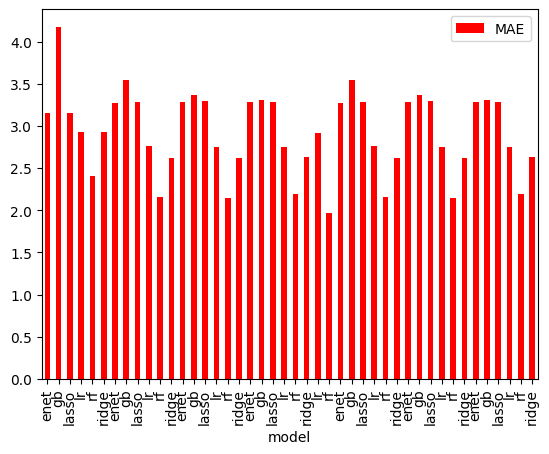

In [590]:
# gca stands for 'get current axis'
import matplotlib.pyplot as plt
ax = plt.gca()
sort_df.plot(kind='bar',x='model',y='MAE', color='red', ax=ax)
# sort_df.plot(kind='bar',x='model',y='R2',ax=ax)


plt.show()

<AxesSubplot: >

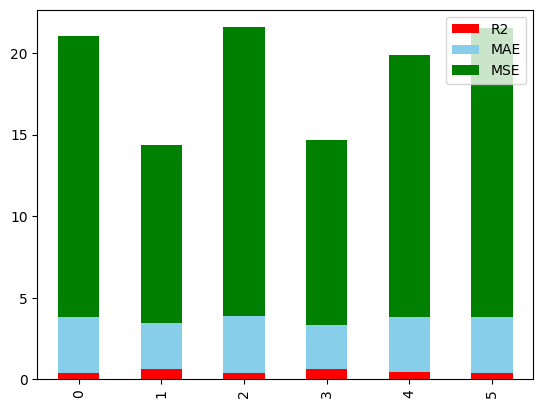

In [583]:
sort_df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])


<AxesSubplot: xlabel='model', ylabel='R2'>

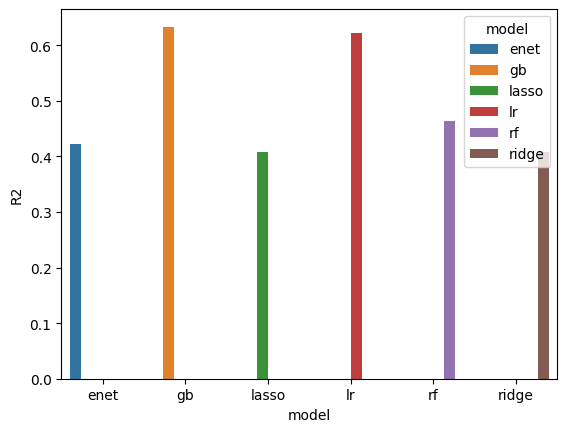

In [572]:
import seaborn as sns
sns.barplot(data=sort_df, x="model", y="R2", hue="model")

In [561]:
scores_array[1]

array(['gb00_orig.pkl', '0.6331946092336369', '2.8050441677885862',
       '10.957524290961336'], dtype='<U32')

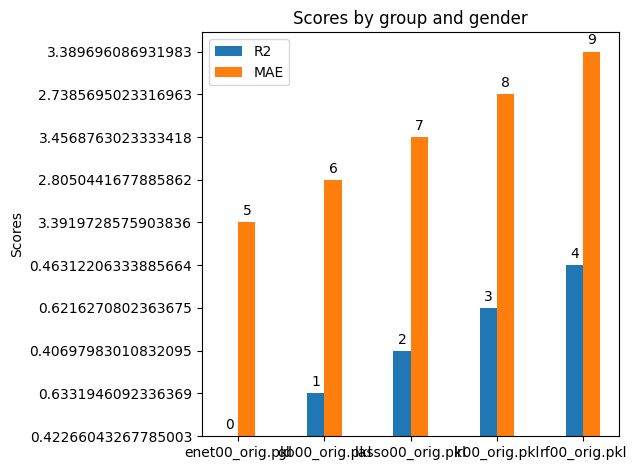

In [562]:
import matplotlib.pyplot as plt
import numpy as np


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels =scores_array[0:5,0]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_array[0:5,1], width, label='R2')
rects2 = ax.bar(x + width/2, scores_array[0:5,2], width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [563]:
loaded_model = pickle.load(open(f'models/rf_0.1_1234_aug9j.pkl', 'rb'))
evaluate_model(loaded_model, X_orig, y_orig)


(0.7407456454792658, 2.163227006150809, 7.744667768549471)

In [564]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(loaded_model, X_orig, y_orig)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score via cross-validation:
-2.788 ± 4.722


In [565]:
scores._fit_and_score

AttributeError: 'numpy.ndarray' object has no attribute '_fit_and_score'

In [ ]:
df['predicted AoR'] = predicted_aor
df['error'] = errors
df_drop['predicted AoR'] = predicted_aor_drop
df_drop['error'] = errors_drop


In [ ]:
y_test = np.array(df['simulated AoR'])
y_hat = np.array(predicted_aor)
y_test_dropped = np.array(df_drop['simulated AoR'])
y_hat_dropped = np.array(predicted_aor_drop)
print(y_test.shape)
print(y_hat.shape)
print(y_test_dropped.shape)
print(y_hat_dropped.shape)


In [ ]:
print(f'{len(y_hat_dropped)=}, {len(y_test_dropped)}')

In [ ]:
y_test_dropped

In [ ]:
for i in range(len(y_test)):
    print(f'{y_test[i]=:.2f}, {y_test[i]=:.2f}')

In [ ]:
writer = pd.ExcelWriter('predicted_aor_dropped.xlsx')
# write dataframe to excel
 
df_drop.to_excel(writer)
 
# save the excel
writer.save()
print("DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.")
